### Practice on TensorFlow and tf.keras

In [1]:
import tensorflow as tf
from tensorflow import keras

# additional libraries
import numpy as np
import matplotlib.pyplot as plt


# from keras.datasets import mnist

# check tf version
print(tf.__version__)
print(np.__version__)


C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


2.1.0
1.16.4


### Dateset import from MNIST

In [48]:
numeric_dataset = keras.datasets.mnist

(train_images, train_labels), (test_images, test_labels) = numeric_dataset.load_data()

In [49]:
# label mapping array
class_names = ['0', '1', '2', '3', '4', '5',
               '6', '7', '8', '9']

### Data exploration

In [50]:
train_images.shape

(60000, 28, 28)

In [51]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [52]:
len(test_labels)

10000

### Data preprocessing

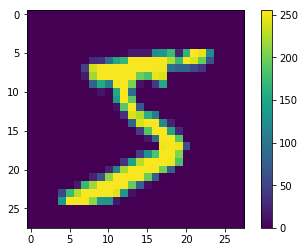

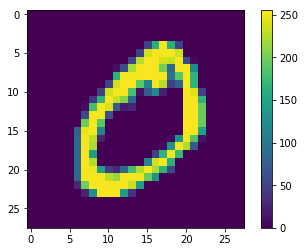

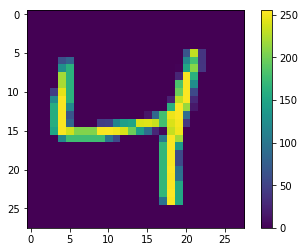

In [55]:
# see the top 3 train_images
for i in range(3):
    plt.figure(i)
    plt.imshow(train_images[i])
    plt.colorbar()
    plt.grid(False)
    plt.show()

In [56]:
# scale value to 0-1 before feeding to NN model
train_images = train_images/255.0
test_images = test_images / 255.0

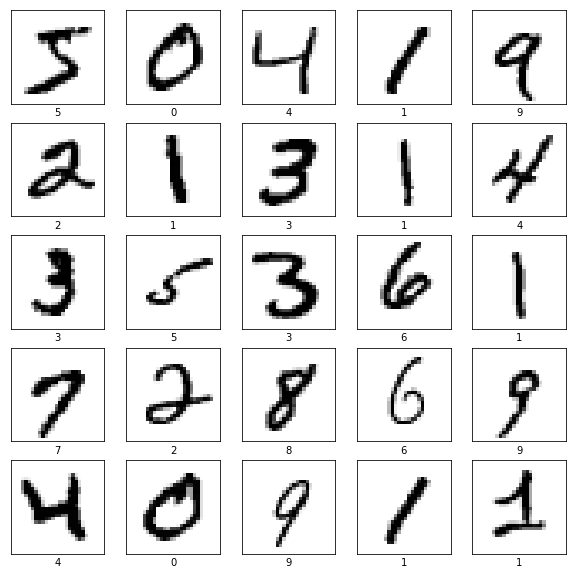

In [57]:
# plot the first 25 training_images for verification
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

### Model building

In [320]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation = 'relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation = 'softmax')
])

model = keras.Sequential()

# model.add(keras.layers.Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
#                  activation ='relu', input_shape = (28,28,1)))
# model.add(keras.layers.Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
#                  activation ='relu'))
# model.add(keras.layers.MaxPool2D(pool_size=(2,2)))
# model.add(keras.layers.Dropout(0.25))


# model.add(keras.layers.Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
#                  activation ='relu'))
# model.add(keras.layers.Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
#                  activation ='relu'))
# model.add(keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)))
# model.add(keras.layers.Dropout(0.25))


model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation = "relu"))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(128, activation = "relu"))
model.add(keras.layers.Dense(10, activation = "softmax"))

#### Define the layer of the network:
1. tf.keras.layers.Flatten() reformats the images from 2d array of 28x28 into a 1d array of 784 components. Only reformats the data.
2. tf.keras.layers.Dense() produces the neural layers; first layer produces 128 neurons (nodes) which is classified into 10 cases from the second layer of Dense() to fit 1 of the 10 classes.

In [321]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Model Feeding

In [322]:
# train_images = tf.convert_to_tensor(train_images, dtype=tf.uint8)
# train_labels = tf.convert_to_tensor(train_labels, dtype=tf.uint8)

model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 62us/sample - loss: 1.6456 - accuracy: 0.8243
Epoch 2/10
60000/60000 [==============================] - 3s 58us/sample - loss: 1.5484 - accuracy: 0.9156
Epoch 3/10
60000/60000 [==============================] - 3s 57us/sample - loss: 1.5373 - accuracy: 0.9247
Epoch 4/10
60000/60000 [==============================] - 3s 54us/sample - loss: 1.5309 - accuracy: 0.9306
Epoch 5/10
60000/60000 [==============================] - 3s 55us/sample - loss: 1.5279 - accuracy: 0.9335
Epoch 6/10
60000/60000 [==============================] - 3s 57us/sample - loss: 1.5266 - accuracy: 0.9347
Epoch 7/10
60000/60000 [==============================] - 3s 56us/sample - loss: 1.5234 - accuracy: 0.9377
Epoch 8/10
60000/60000 [==============================] - 3s 56us/sample - loss: 1.5232 - accuracy: 0.9381
Epoch 9/10
60000/60000 [==============================] - 3s 57us/sample - loss: 1.5215 - accuracy: 0.9394
Epoch 10/10
60

In [323]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)


print("\n\tTest loss:", test_loss)
print("\n\tTest accuracy:", test_acc)

10000/10000 - 0s - loss: 1.4976 - accuracy: 0.9628

	Test loss: 1.4976056758880616

	Test accuracy: 0.9628


In [324]:
# save model
model.save("model1.h5")

(28, 28)

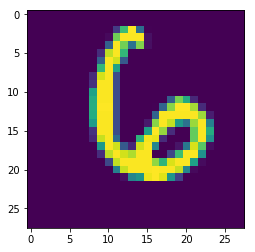

In [325]:
import imageio

im = imageio.imread("https://i.imgur.com/a3Rql9C.png")
gray = np.dot(im[...,:3], [0.299, 0.587, 0.114])


plt.imshow(gray, cmap = plt.get_cmap('gray'))
plt.imshow(test_images[88])
test_images[88].shape

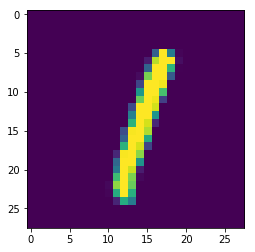

In [326]:
gray = test_images[5].reshape(1, 28, 28, 1)
gray /= 255 #  normalize to 0-1
gray.shape
plt.imshow(gray[0,:,:,0])

In [327]:
prediction = model.predict(gray)
print("The predicted number is {}".format(prediction.argmax()))

The predicted number is 5


In [328]:
prediction

array([[0.07458764, 0.00341268, 0.00947877, 0.00683183, 0.135557  ,
        0.5637572 , 0.06855321, 0.1069469 , 0.00376672, 0.02710804]],
      dtype=float32)

### Make predictions

In [18]:
# to be continued